In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_csv("Dataset-SA.csv")

In [91]:
data.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive


In [93]:
data.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [94]:
data.columns = ["name", "price", "rate", "review", "summary", "sentiment"]

In [95]:
print("nb of 5/5 rates :"+str(data[data.rate=="5"].shape[0]))
print("nb of 4/5 rates :"+str(data[data.rate=="4"].shape[0]))
print("nb of 3/5 rates :"+str(data[data.rate=="3"].shape[0]))
print("nb of 2/5 rates :"+str(data[data.rate=="2"].shape[0]))
print("nb of 1/5 rates :"+str(data[data.rate=="1"].shape[0]))


nb of 5/5 rates :118765
nb of 4/5 rates :41894
nb of 3/5 rates :16599
nb of 2/5 rates :6491
nb of 1/5 rates :21300


In [96]:
data.rate.unique()

array(['5', '3', '1', '4', '2',
       'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)'],
      dtype=object)

In [97]:
data = data[data['rate'].isin(['5', '3', '1', '4', '2'])]

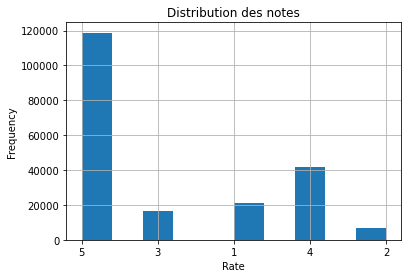

In [98]:
data['rate'].hist()
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution des notes')
plt.show()

In [99]:
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
positive    166579
negative     28231
neutral      10239
Name: count, dtype: int64


In [100]:
non_text_reviews = []

for review in data['review']:
    if not isinstance(review, str):
        non_text_reviews.append(review)

if non_text_reviews:
    print("Valeurs non textuelles dans la colonne 'Review':")
    for review in non_text_reviews:
        print(review)

Valeurs non textuelles dans la colonne 'Review':
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [101]:
data['review'].fillna("", inplace=True)

In [107]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

text = ' '.join(data['review'])

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1).generate(text)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)

plt.imshow(wordcloud)
plt.show()

ValueError: Only supported for TrueType fonts

In [38]:
print(data[['price', 'rate']].describe())

         price    rate
count   205052  205052
unique     525       8
top       1299       5
freq      9150  118765


In [47]:
pip install wordCloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 KB 4.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
data['review'].dropna()

0                  super!
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
205047          must buy!
205048             super!
205049               nice
205050          just wow!
205051    value-for-money
Name: review, Length: 180385, dtype: object

In [53]:
data['review']

0                  super!
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
205047          must buy!
205048             super!
205049               nice
205050          just wow!
205051    value-for-money
Name: review, Length: 205049, dtype: object

In [109]:
data.price.unique()

array(['3999', '8999', '7999', '9999', '1199', '499', '1999', '1099',
       '997', '1499', '435', '1349', '30999', '13999', '9990', '14299',
       '5298', '7599', '11999', '329', '425', '249', '302', '59', '245',
       '79', '349', '449', '340', '299', '469', '26990', '23479', '29390',
       '29990', '20990', '44490', '25990', '38490', '42000', '44890',
       '31590', '41990', '52990', '33990', '18990', '50999', '45550',
       '1401', '359', '1453', '254', '205', '1256', '1547', '195', '575',
       '366', '209', '219', '549', '859', '210', '215', '1142', '235',
       '221', '1599', '2454', '6099', '2399', '599', '849', '699', '4449',
       '4098', '5599', '5499', '1448', '3569', '2879', '1799', '1329',
       '5390', '11500', '1220', '9050', '6505', '6495', '11595', '7649',
       '4399', '6029', '6299', '5919', '6390', '2695', '2949', '7909',
       '4499', '6525', '6589', '5039', '4219', '4319', '7499', '379',
       '3499', '6999', '224', '227', '385', '199', '999', '480', 

In [110]:
data['price'] = data['price'].str.replace(',', '').astype(float)


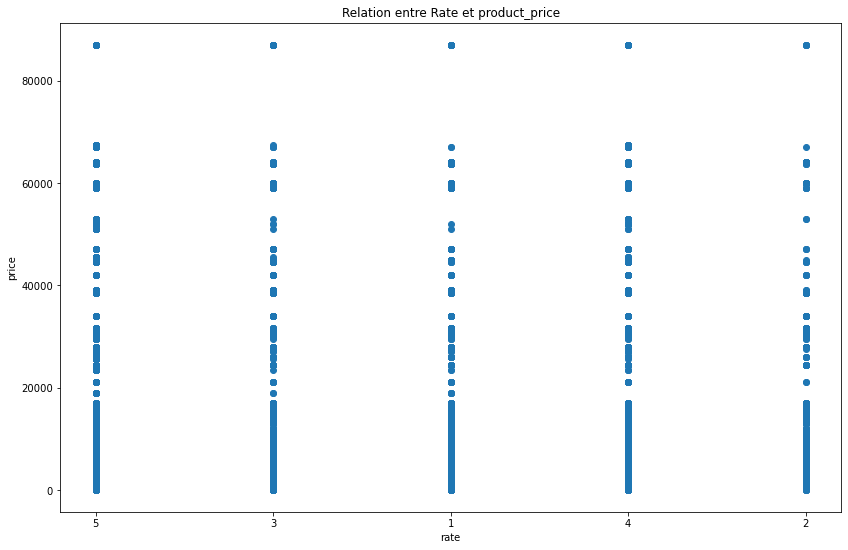

In [113]:
plt.figure(figsize=(14, 9))

plt.scatter(data['rate'], data['price'])
plt.xlabel('rate')
plt.ylabel('price')
plt.title('Relation entre Rate et product_price')
plt.show()

In [121]:
from nltk.tokenize import word_tokenize


data['review'].apply(word_tokenize)


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/samy/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [117]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 5.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 KB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [122]:
%%sh
echo "# flipkart-reviews_sentiment" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/fellahsamy/flipkart-reviews_sentiment.git
git push -u origin main

Initialized empty Git repository in /mnt/d/dev/flipkart reviews_sentiment_analysis/.git/


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: empty ident name (for <samy@samy.>) not allowed
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/fellahsamy/flipkart-reviews_sentiment.git'


CalledProcessError: Command 'b'echo "# flipkart-reviews_sentiment" >> README.md\ngit init\ngit add README.md\ngit commit -m "first commit"\ngit branch -M main\ngit remote add origin https://github.com/fellahsamy/flipkart-reviews_sentiment.git\ngit push -u origin main\n'' returned non-zero exit status 1.